In [1]:
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm as cm

# Processing the data

In [2]:
df_pop_reg_2002 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2002')
df_pop_reg_2003 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2003')
df_pop_reg_2004 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2004')
df_pop_reg_2005 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2005')
df_pop_reg_2006 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2006')
df_pop_reg_2007 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2007')
df_pop_reg_2008 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2008')
df_pop_reg_2009 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2009')
df_pop_reg_2010 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2010')
df_pop_reg_2011 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2011')
df_pop_reg_2012 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2012')
df_pop_reg_2013 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2013')
df_pop_reg_2014 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2014')
df_pop_reg_2015 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2015')
df_pop_reg_2016 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2016')
df_pop_reg_2017 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2017')

In [3]:
df_pop_reg_2002['year'] = '2002' 
df_pop_reg_2003['year'] = '2003' 
df_pop_reg_2004['year'] = '2004' 
df_pop_reg_2005['year'] = '2005' 
df_pop_reg_2006['year'] = '2006' 
df_pop_reg_2007['year'] = '2007' 
df_pop_reg_2008['year'] = '2008' 
df_pop_reg_2009['year'] = '2009' 
df_pop_reg_2010['year'] = '2010' 
df_pop_reg_2011['year'] = '2011' 
df_pop_reg_2012['year'] = '2012' 
df_pop_reg_2013['year'] = '2013' 
df_pop_reg_2014['year'] = '2014' 
df_pop_reg_2015['year'] = '2015'
df_pop_reg_2016['year'] = '2015'
df_pop_reg_2017['year'] = '2015'

In [4]:
df_pop_reg = pd.concat([df_pop_reg_2002, df_pop_reg_2003, df_pop_reg_2004, df_pop_reg_2005, df_pop_reg_2006, df_pop_reg_2007, df_pop_reg_2008,
                    df_pop_reg_2009, df_pop_reg_2010, df_pop_reg_2011, df_pop_reg_2012, df_pop_reg_2013, df_pop_reg_2014, df_pop_reg_2015, 
                    df_pop_reg_2016, df_pop_reg_2017], ignore_index=True)

In [5]:
df_pop_reg.sample(3)

Régions   Ensemble                          \
             Unnamed: 0_level_1 0 à 19 ans 20 à 39 ans 40 à 59 ans   
85                    Grand Est    1361904     1461516     1554987   
12   Provence-Alpes-Côte d'Azur    1111519     1191444     1237197   
303        Auvergne-Rhône-Alpes    1948161     1907775     2087303   

                                            Hommes                          \
    60 à 74 ans 75 ans et plus    Total 0 à 19 ans 20 à 39 ans 40 à 59 ans   
85       689611         422074  5490092     697214      737346      773360   
12       676524         412812  4629496     569720      583537      597864   
303     1270141         734907  7948287     997234      948780     1034817   

                                            Femmes                          \
    60 à 74 ans 75 ans et plus    Total 0 à 19 ans 20 à 39 ans 40 à 59 ans   
85       322187         147873  2677980     664690      724170      781627   
12       312401         150981  2214503     541799      607907      639333   
303      601808         282054  3864693     950927      958995     1052486   

                                         year  
    60 à 74 ans 75 ans et plus    Total        
85       367424         274201  2812112  2006  
12       364123         261831  2414993  2002  
303      668333         452853  4083594  2015

In [6]:
df_rdb_2002 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2002-Déf par hab')
df_rdb_2003 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2003-Déf par hab')
df_rdb_2004 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2004-Déf par hab')
df_rdb_2005 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2005-Déf par hab')
df_rdb_2006 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2006-Déf par hab')
df_rdb_2007 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2007-Déf par hab')
df_rdb_2008 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2008-Déf par hab')
df_rdb_2009 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2009-Déf par hab')
df_rdb_2010 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2010-Déf par hab')
df_rdb_2011 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2011-Def par hab')
df_rdb_2012 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2012-Déf par hab')
df_rdb_2013 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2013-déf par hab')
df_rdb_2014 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2014-déf par hab')
df_rdb_2015 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2015-semidéf par hab')

In [7]:
df_rdb_2002['year'] = '2002' 
df_rdb_2003['year'] = '2003' 
df_rdb_2004['year'] = '2004' 
df_rdb_2005['year'] = '2005' 
df_rdb_2006['year'] = '2006' 
df_rdb_2007['year'] = '2007' 
df_rdb_2008['year'] = '2008' 
df_rdb_2009['year'] = '2009' 
df_rdb_2010['year'] = '2010' 
df_rdb_2011['year'] = '2011' 
df_rdb_2012['year'] = '2012' 
df_rdb_2013['year'] = '2013' 
df_rdb_2014['year'] = '2014' 
df_rdb_2015['year'] = '2015' 

In [8]:
df_rdb = pd.concat([df_rdb_2002, df_rdb_2003, df_rdb_2004, df_rdb_2005, df_rdb_2006, df_rdb_2007, df_rdb_2008, df_rdb_2009, df_rdb_2010,
                   df_rdb_2011, df_rdb_2012, df_rdb_2013, df_rdb_2014, df_rdb_2015], ignore_index=True)

In [9]:
df_rdb.sample(3)

,Régions,Excédent brut et revenu mixte,Salaires et traitements bruts,Cotisations sociales des salariés et des non-salariés,Impôts,Prestations en espèces,Autres (1),Revenu disponible brut,year
257,Corse,5278.0,10348.0,1948.0,2847.0,6370.0,1926.0,19127.0,2013
241,Pays de la Loire,3890.0,11317.0,1955.0,2559.0,7056.0,1442.0,19191.0,2012
206,France (France métropolitaine+DOM+Hors territo...,4323.0,11962.0,2024.0,2671.0,6455.0,1738.0,19783.0,2010


# Analysis on Population

In [12]:
df_pop_reg_men = df_pop_reg[['Hommes', 'Régions', 'year']]
df_pop_reg_women = df_pop_reg[['Femmes', 'Régions', 'year']]
df_pop_reg_all = df_pop_reg[['Ensemble', 'Régions', 'year']]

In [13]:
def process_pop(df):
    tmp = df.copy()
    tmp.columns = tmp.columns.droplevel()
    tmp = tmp.rename(columns={'Unnamed: 0_level_1':'region', '':'year'})
    return tmp

In [14]:
df_pop_reg_men = process_pop(df_pop_reg_men)
df_pop_reg_women = process_pop(df_pop_reg_women)
df_pop_reg_all = process_pop(df_pop_reg_all)

In [15]:
df_pop_reg_men['gender'] = 'male'
df_pop_reg_women['gender'] = 'female'

df_pop_reg_joined = pd.concat([df_pop_reg_men, df_pop_reg_women], ignore_index=True )

In [16]:
df_pop_reg_joined.sample(3)

,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,region,year,gender
431,1480965,1784919,1618036,650487,462048,5996455,Île-de-France,2007,female
646,346985,271044,302042,136880,67967,1124918,DOM,2015,female
501,135876,119207,112904,38009,17187,423183,La Réunion,2010,female


In [17]:
# Gender & Region
tmp_gr = df_pop_reg_joined.groupby(['gender', 'year', 'region'])['Total'].sum()
gr = pd.DataFrame(tmp_gr).reset_index()

In [18]:
tmp_total = df_pop_reg_joined.groupby(['year'])['Total'].sum()
total = pd.DataFrame(tmp_total).reset_index()

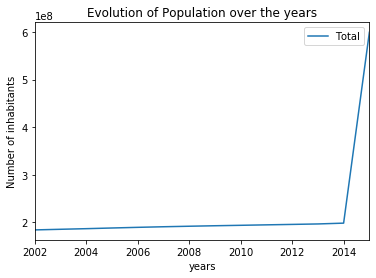

In [19]:
fig = total.plot(x='year', y='Total', kind='line')
plt.rcParams['axes.facecolor'] = 'white'
plt.title('Evolution of Population over the years')
plt.xlabel("years")
plt.ylabel("Number of inhabitants")
plt.show();

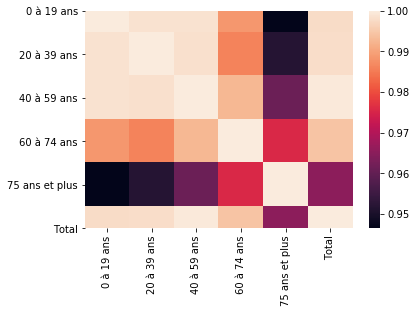

In [20]:
# plot the heatmap on Seaborn
corr = df_pop_reg_joined.corr()
sns.heatmap(corr,
xticklabels=corr.columns,
yticklabels=corr.columns);

# Analysis on Revenue

In [21]:
revenue_per_region = df_rdb.groupby(['Régions', 'year'])['Revenu disponible brut'].mean()

In [22]:
rpg = pd.DataFrame(revenue_per_region).reset_index()

In [23]:
rpg_year = rpg.groupby('year').mean().reset_index()
rpg_region = rpg.groupby('Régions').mean().reset_index()

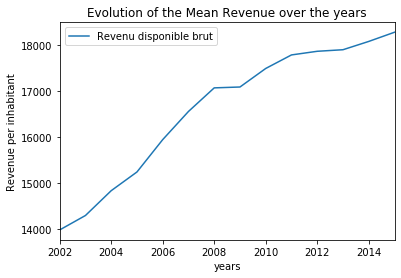

In [24]:
fig = rpg_year.plot(x='year', y='Revenu disponible brut', kind='line')
plt.rcParams['axes.facecolor'] = 'white'
plt.title('Evolution of the Mean Revenue over the years')
plt.xlabel("years")
plt.ylabel("Revenue per inhabitant")
plt.show();

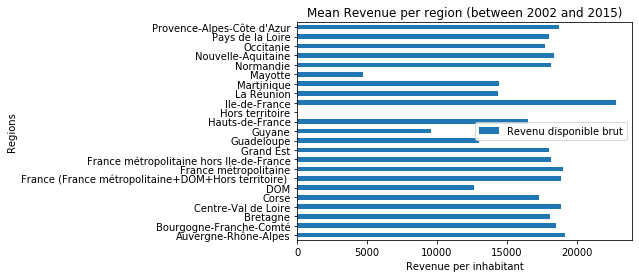

In [25]:
fig = rpg_region.plot(x='Régions', y='Revenu disponible brut', kind='barh')
plt.rcParams['axes.facecolor'] = 'white'
plt.title('Mean Revenue per region (between 2002 and 2015)')
plt.xlabel("Revenue per inhabitant")
plt.ylabel("Regions")
plt.show();

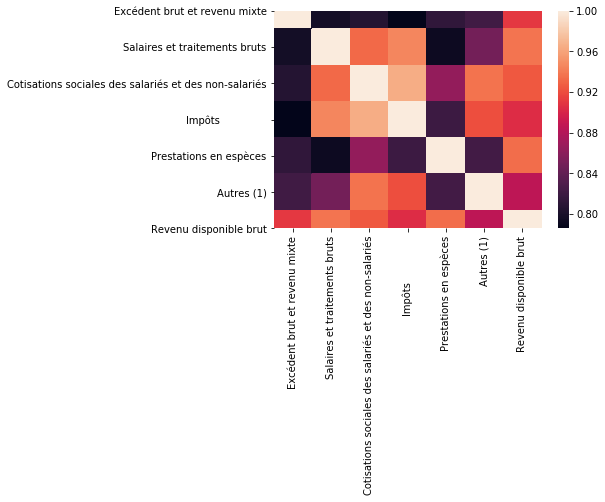

In [26]:
# plot the heatmap on Seaborn
corr = df_rdb.corr()
sns.heatmap(corr,
xticklabels=corr.columns,
yticklabels=corr.columns);

# Additional Information

<u> list of ideas </u> :

    - for every region, use an iconic element of this region, and do a "pie-chart" like version of it with gender/age
    - a disease-like visualization (many points in a square) with the evolution of the gender/age over the years
    - violin plots for the distribution of the revenue over each region

In [27]:
def correlation_matrix(df, method):
    
    """
    Method used for plotting a correlation matrix depending on the method asked.
    """
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    corr_matrix = df.corr(method)
    cax = ax1.imshow(corr_matrix,interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Emo-DB Feature ' + method + ' Correlation')
    labels = corr_matrix.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-0.25, 0,.25,.5,.75,1])
    plt.show()